Código e Execução do StochasticHillClimbing


=== Estatísticas HC ===
Média: 988.3333, Desvio padrão: 41.3492

=== Estatísticas SHC ===
Média: 871.4333, Desvio padrão: 60.2886


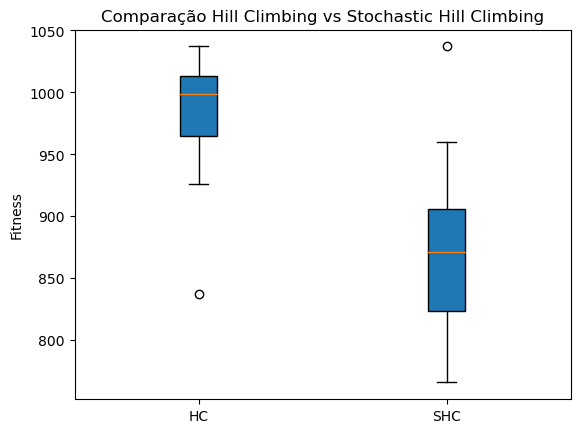


Boxplot comparativo salvo em: ../imagens/boxplot_comparativo.png


In [1]:
import os
import sys
import copy
import random
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../Codigos"))
from hillClimbing import HillClimbing
from knapsack import knapsack

def gerar_vizinhos_knapsack(solucao, n_vizinhos=10):
    vizinhos = []
    n_itens = len(solucao)
    sorted_pos = []

    for i in range(n_vizinhos):
        pos = random.randint(0, n_itens - 1)
        if pos in sorted_pos:
            continue
        vizinho = solucao.copy()
        vizinho[pos] = 1 - vizinho[pos]  # flip do bit
        vizinhos.append(vizinho)
        sorted_pos.append(pos)

    return vizinhos


# ---------------------------
# Stochastic Hill Climbing
# ---------------------------
class StochasticHillClimbing:
    def __init__(self, funcao_fitness, gerar_vizinhos, maximizar=True):
        self.funcao_fitness = funcao_fitness
        self.gerar_vizinhos = gerar_vizinhos
        self.maximizar = maximizar
        self.historico = []

    def executar(self, solucao_inicial, max_iteracoes=1000, verbose=False):
        solucao_atual = copy.deepcopy(solucao_inicial)
        fitness_atual = self.funcao_fitness(solucao_atual)
        self.historico = [fitness_atual]
        iteracao = 0

        while iteracao < max_iteracoes:
            iteracao += 1
            vizinhos = self.gerar_vizinhos(solucao_atual)
            candidatos_melhores = []

            # Seleciona todos os vizinhos que são melhores que a solução atual
            for vizinho in vizinhos:
                fitness_vizinho = self.funcao_fitness(vizinho)
                eh_melhor = (
                    fitness_vizinho > fitness_atual
                    if self.maximizar
                    else fitness_vizinho < fitness_atual
                )
                if eh_melhor:
                    candidatos_melhores.append((vizinho, fitness_vizinho))

            if candidatos_melhores:
                # Escolhe aleatoriamente um vizinho melhor
                vizinho_escolhido, fitness_vizinho = random.choice(candidatos_melhores)
                solucao_atual = copy.deepcopy(vizinho_escolhido)
                fitness_atual = fitness_vizinho
                self.historico.append(fitness_atual)
            else:
                break

        return solucao_atual, fitness_atual, self.historico

# ---------------------------
# Execução das simulações
# ---------------------------
if __name__ == "__main__":
    from knapsack import knapsack  

    DIM = 20
    MAX_ITERACOES = 200
    N_SIMULACOES = 30

    resultados_HC = []
    resultados_SHC = []

    for i in range(N_SIMULACOES):
        solucao_inicial = [int(random.random() > 0.8) for _ in range(DIM)]

        # Hill Climbing Tradicional
        hc = HillClimbing(
            funcao_fitness=lambda sol: knapsack(sol, dim=DIM)[0],
            gerar_vizinhos=gerar_vizinhos_knapsack,
            maximizar=True
        )
        _, fitness_hc, _ = hc.executar(solucao_inicial, max_iteracoes=MAX_ITERACOES)
        resultados_HC.append(fitness_hc)

        # Stochastic Hill Climbing
        shc = StochasticHillClimbing(
            funcao_fitness=lambda sol: knapsack(sol, dim=DIM)[0],
            gerar_vizinhos=gerar_vizinhos_knapsack,
            maximizar=True
        )
        _, fitness_shc, _ = shc.executar(solucao_inicial, max_iteracoes=MAX_ITERACOES)
        resultados_SHC.append(fitness_shc)

    # Estatísticas
    print("\n=== Estatísticas HC ===")
    print(f"Média: {np.mean(resultados_HC):.4f}, Desvio padrão: {np.std(resultados_HC):.4f}")

    print("\n=== Estatísticas SHC ===")
    print(f"Média: {np.mean(resultados_SHC):.4f}, Desvio padrão: {np.std(resultados_SHC):.4f}")

    # Boxplot comparativo
    plt.boxplot([resultados_HC, resultados_SHC], labels=["HC", "SHC"], patch_artist=True)
    plt.title("Comparação Hill Climbing vs Stochastic Hill Climbing")
    plt.ylabel("Fitness")
    caminho_arquivo = "../imagens/boxplot_comparativo.png"
    plt.savefig(caminho_arquivo, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"\nBoxplot comparativo salvo em: {caminho_arquivo}")


In [2]:
for resultado in resultados_SHC :
    print(resultado)

945
784
784
960
873
766
951
823
893
909
817
1037
936
869
788
870
927
811
878
825
911
856
811
833
871
871
898
869
897
880
